### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [97]:
# download S&P500 data
ticker = "SPY"
start_date = dt.datetime(2010, 1, 1)
end_date = dt.datetime(2025, 10, 31)

data = yf.download(ticker, start=start_date, end=end_date)

C:\Users\anuki\AppData\Local\Temp\ipykernel_44992\2099108387.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


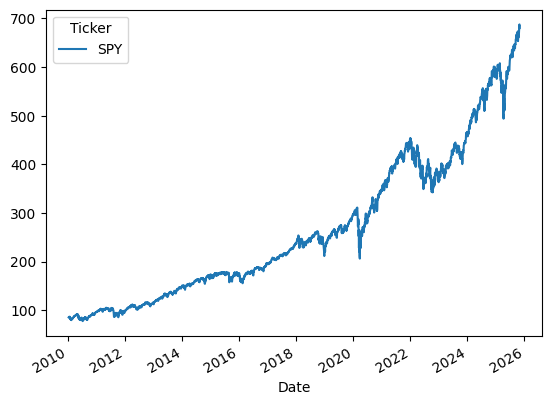

In [88]:
# plot closing prices
data['Close'].plot()
plt.show()

In [89]:
# column for returns 
data[('Returns',ticker)] = data.Close.pct_change()
data[('Log_Returns',ticker)] = np.log(1 + data[('Returns',ticker)])
data.dropna(inplace=True)

# Constant Expected Return model (CER)

The CER model assumes that an asset’s return over time is normally distributed with a constant mean and constant variance.

$$ r_t = \mu+ \epsilon _i$$

where
- $\mu$ is expected returns of an asset.
- $\epsilon_i$ is a random shock. 
- $\epsilon_i \overset{\mathrm{iid}}{\sim} N(0,\sigma^2)$. Where $\sigma^2$ is fixed variance.


More details: https://faculty.washington.edu/ezivot/econ424/constantexpectedreturn.pdf

In [90]:
returns = data[('Returns',ticker)]
# returns = data[('Log_Returns',ticker)]

# find mu -  mean return
mean_return = returns.mean()

# find sigma - standard deviation of returns
std_return = returns.std()
std_return

np.float64(0.010871329123274213)

Text(0.5, 1.0, 'Daily Returns')

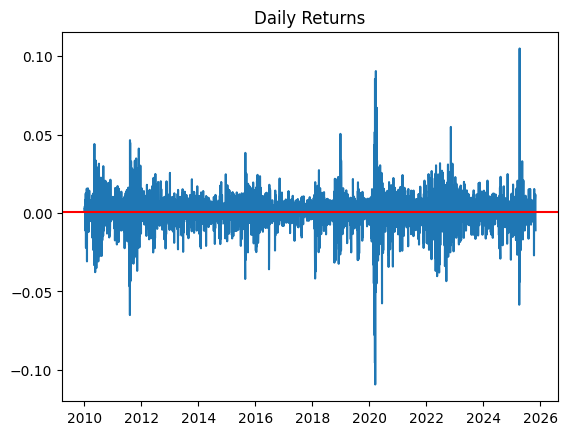

In [91]:
# plot returns
plt.plot(data.index, returns)
plt.axhline(mean_return, color='red')
plt.title(f'Daily Returns') 

In [92]:
# Constant Expected Returns Model
cer_simulated = np.random.normal(mean_return, std_return, size=1000)

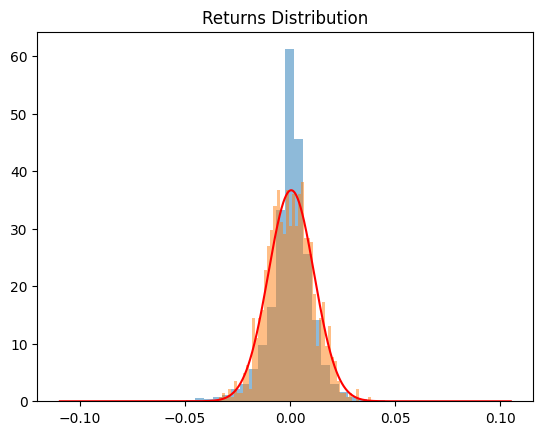

In [95]:
# returns as a histogram
plt.hist(returns, bins=50, density=True, alpha=0.5)
plt.hist(cer_simulated, bins=50, density=True, alpha=0.5)

# pdf line
x = np.linspace(returns.min(), returns.max(), 1000)
pdf = (1 / (std_return * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_return) / std_return) ** 2)
plt.plot(x, pdf , color='red')

plt.title(f'Returns Distribution')
plt.show()

### Kolmogorov–Smirnov Test

The simulated distribution and actual return distributions do not seem to match.
So we will use the Kolmogorov–Smirnov Test to compare the two.

The p-value = 0.00116 < 0.05.

So we can see the CER model is not very accurate at modeling volatility.

In [96]:
from scipy.stats import ks_2samp

ks = ks_2samp(returns, cer_simulated)
ks.pvalue

np.float64(1.839364857891523e-11)